In [1]:
# Group 1

# Craig Perkins
# Sneha Sharma Satheesha
# Pranay Bindela

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import bamboolib
from sklearn.impute import KNNImputer
import numpy as np

In [2]:
df = pd.read_csv('../data/massachusetts-history.csv')

In [3]:
df

           date state    death  deathConfirmed  deathIncrease  deathProbable  \
0    2021-03-07    MA  16417.0         16085.0             43          332.0   
1    2021-03-06    MA  16374.0         16044.0             52          330.0   
2    2021-03-05    MA  16322.0         15992.0             26          330.0   
3    2021-03-04    MA  16296.0         15967.0             44          329.0   
4    2021-03-03    MA  16252.0         15925.0             70          327.0   
..          ...   ...      ...             ...            ...            ...   
406  2020-01-26    MA      NaN             NaN              0            NaN   
407  2020-01-25    MA      NaN             NaN              0            NaN   
408  2020-01-24    MA      NaN             NaN              0            NaN   
409  2020-01-23    MA      NaN             NaN              0            NaN   
410  2020-01-22    MA      NaN             NaN              0            NaN   

     hospitalized  hospitalizedCumulati

In [12]:
df.head(10)

         date state    death  deathConfirmed  deathIncrease  deathProbable  \
0  2021-03-07    MA  16417.0         16085.0             43          332.0   
1  2021-03-06    MA  16374.0         16044.0             52          330.0   
2  2021-03-05    MA  16322.0         15992.0             26          330.0   
3  2021-03-04    MA  16296.0         15967.0             44          329.0   
4  2021-03-03    MA  16252.0         15925.0             70          327.0   
5  2021-03-02    MA  16182.0         15859.0             38          323.0   
6  2021-03-01    MA  16144.0         15822.0             26          322.0   
7  2021-02-28    MA  16118.0         15796.0             51          322.0   
8  2021-02-27    MA  16067.0         15744.0             43          323.0   
9  2021-02-26    MA  16024.0         15703.0             46          321.0   

   hospitalized  hospitalizedCumulative  hospitalizedCurrently  \
0       19713.0                 19713.0                  665.0   
1       1

In [13]:
columns_to_drop = [
    'state',
    'hospitalized',
    'inIcuCumulative',
    'negativeTestsAntibody',
    'negativeTestsPeopleAntibody',
    'negativeTestViral',
    'onVentilatorCumulative',
    'positiveScore',
    'positiveTestsAntibody',
    'positiveTestsAntigen',
    'positiveTestsPeopleAntigen',
    'totalTestEncountersViral',
    'totalTestEncountersViralIncrease',
    'totalTestsAntibody',
    'totalTestsAntigen',
    'totalTestsViral',
    'totalTestsViralIncrease'
]

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [14]:
df.sample(5).T

                                      300         117         19          133  \
date                           2020-05-11  2020-11-10  2021-02-16  2020-10-25   
death                              5108.0     10184.0     15567.0      9864.0   
deathConfirmed                     5108.0      9957.0     15257.0      9640.0   
deathIncrease                         129          21          50          25   
deathProbable                         NaN       227.0       310.0       224.0   
hospitalizedCumulative             7732.0     13373.0     18859.0     13142.0   
hospitalizedCurrently              3102.0       618.0      1096.0       538.0   
hospitalizedIncrease                  115           0           0          16   
inIcuCurrently                      813.0       150.0       275.0       109.0   
negative                         316266.0   2757216.0   4242966.0   2485042.0   
negativeIncrease                     5670       13697        5070       15923   
negativeTestsViral          

In [15]:
df.describe(include='all')

              date         death  deathConfirmed  deathIncrease  \
count          411    355.000000      309.000000     411.000000   
unique         411           NaN             NaN            NaN   
top     2021-03-07           NaN             NaN            NaN   
freq             1           NaN             NaN            NaN   
mean           NaN   9001.850704     9939.190939      39.944039   
std            NaN   4018.084799     2770.754902      42.868879   
min            NaN      2.000000     4004.000000     -41.000000   
25%            NaN   7635.500000     8213.000000      11.000000   
50%            NaN   9180.000000     9295.000000      26.000000   
75%            NaN  11121.000000    11465.000000      55.000000   
max            NaN  16417.000000    16085.000000     252.000000   

        deathProbable  hospitalizedCumulative  hospitalizedCurrently  \
count      280.000000              352.000000             338.000000   
unique            NaN                     NaN      

In [16]:
df['date'] =  pd.to_datetime(df['date'], infer_datetime_format=True)

Text(0, 0.5, 'Date')

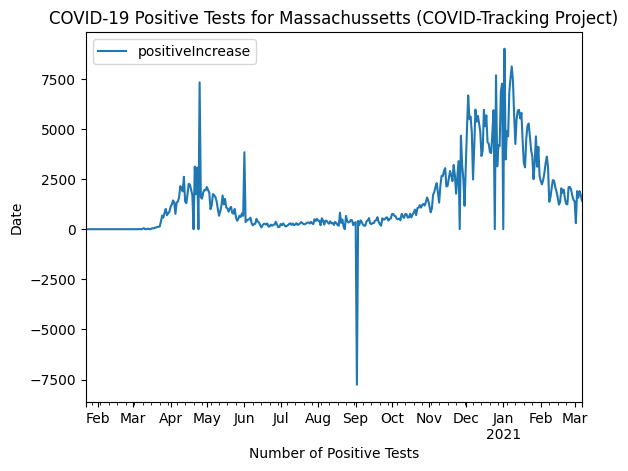

In [17]:
lines = df.plot.line(x='date', y='positiveIncrease', title='COVID-19 Positive Tests for Massachussetts (COVID-Tracking Project)')
lines.set_xlabel("Number of Positive Tests")
lines.set_ylabel("Date")

In [18]:
# Remote the bad datapoint(s)

rows_with_negative = df[df['positiveIncrease'] < 0]

In [19]:
df.loc[df['positiveIncrease'] < 0, ['positiveIncrease']] = 0

Text(0, 0.5, 'Date')

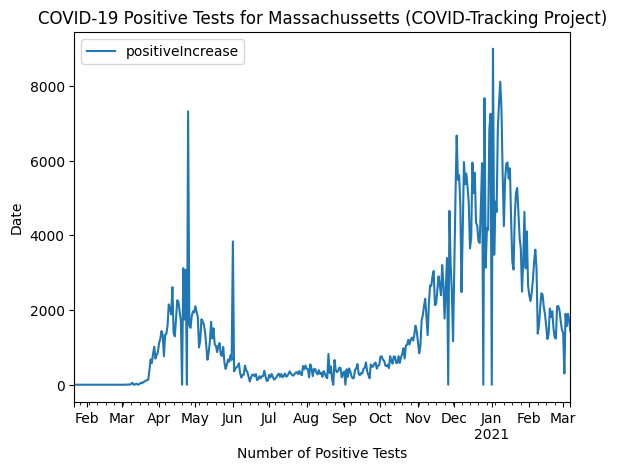

In [20]:
lines = df.plot.line(x='date', y='positiveIncrease', title='COVID-19 Positive Tests for Massachussetts (COVID-Tracking Project)')
lines.set_xlabel("Number of Positive Tests")
lines.set_ylabel("Date")


Text(0, 0.5, 'Date')

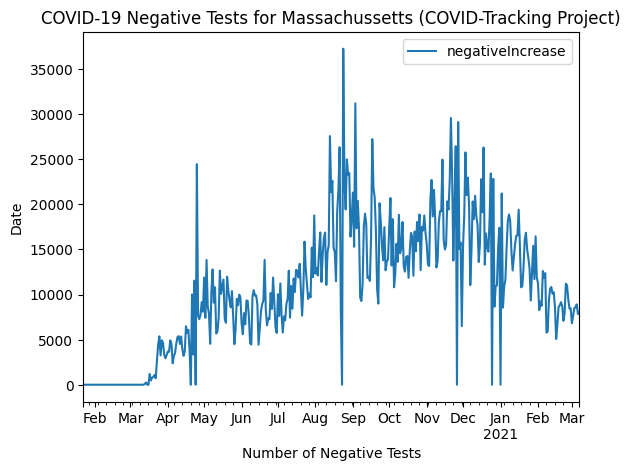

In [21]:
df.loc[df['negativeIncrease'] < 0, ['negativeIncrease']] = 0
lines = df.plot.line(x='date', y='negativeIncrease', title='COVID-19 Negative Tests for Massachussetts (COVID-Tracking Project)')
lines.set_xlabel("Number of Negative Tests")
lines.set_ylabel("Date")

In [48]:
df = df.drop(columns=['negativeTestsViral'])
df = df.drop(columns=['positiveTestsPeopleAntibody'])

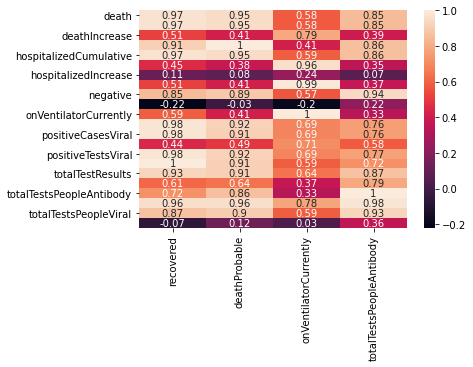

<Figure size 720x792 with 0 Axes>

In [49]:
matrix = df.corr().round(2)
x=matrix[['recovered','deathProbable','onVentilatorCurrently','totalTestsPeopleAntibody']]
sns.heatmap(x, annot=True)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(11)
plt.show()

In [50]:
imputer=KNNImputer(n_neighbors=5)
df['totalTestsPeopleAntigen']=imputer.fit_transform(df[['totalTestsPeopleAntigen']])
df['recovered_imputed']=imputer.fit_transform(df[['recovered']])
df['deathProbable']=imputer.fit_transform(df[['deathProbable']])
df['onVentilatorCurrently']=imputer.fit_transform(df[['onVentilatorCurrently']])
df['totalTestsPeopleAntibody']=imputer.fit_transform(df[['totalTestsPeopleAntibody']])
df

          date    death  deathConfirmed  deathIncrease  deathProbable  \
0   2021-03-07  16417.0         16085.0             43         332.00   
1   2021-03-06  16374.0         16044.0             52         330.00   
2   2021-03-05  16322.0         15992.0             26         330.00   
3   2021-03-04  16296.0         15967.0             44         329.00   
4   2021-03-03  16252.0         15925.0             70         327.00   
..         ...      ...             ...            ...            ...   
406 2020-01-26      NaN             NaN              0         235.75   
407 2020-01-25      NaN             NaN              0         235.75   
408 2020-01-24      NaN             NaN              0         235.75   
409 2020-01-23      NaN             NaN              0         235.75   
410 2020-01-22      NaN             NaN              0         235.75   

     hospitalizedCumulative  hospitalizedCurrently  hospitalizedIncrease  \
0                   19713.0                  66

C:\Users\sneha\Anaconda3\envs\bamboolib\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



<AxesSubplot:xlabel='death'>

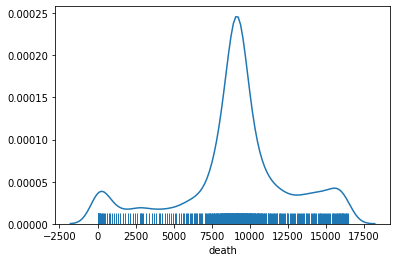

In [71]:
sns.distplot(df['death'], hist=False, rug=True)

C:\Users\sneha\Anaconda3\envs\bamboolib\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



<AxesSubplot:xlabel='deathIncrease'>

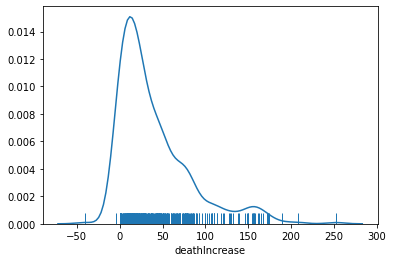

In [72]:
sns.distplot(df['deathIncrease'], hist=False, rug=True)

C:\Users\sneha\Anaconda3\envs\bamboolib\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



<AxesSubplot:xlabel='deathConfirmed'>

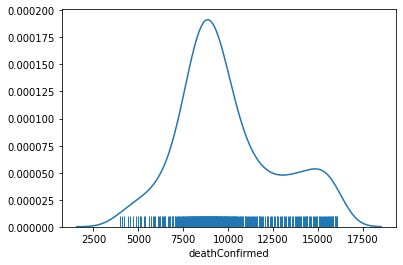

In [75]:
sns.distplot(df['deathConfirmed'], hist=False, rug=True)

In [85]:
df['death'].fillna(df['death'].median(),inplace=True)
df['deathIncrease'].fillna(method ='pad',inplace=True)
df['deathConfirmed'].fillna(method ='pad',inplace=True)
df['hospitalizedCumulative'].fillna(method ='pad',inplace=True)
df['hospitalizedCurrently'].fillna(method ='pad',inplace=True)
df['inIcuCurrently'].fillna(method ='pad',inplace=True)
df['negative'].fillna(method ='pad',inplace=True)
df['positive'].fillna(method ='pad',inplace=True)
df['positiveCasesViral'].fillna(method ='pad',inplace=True)
df['totalTestsPeopleViral'].fillna(method ='pad',inplace=True)

In [96]:
import calendar
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df['day'] = df['day'].astype('string')
df['month']=df['month'].apply(lambda x: calendar.month_abbr[x])

In [98]:
df.describe()

              death  deathConfirmed  deathIncrease  deathProbable  \
count    411.000000      411.000000     411.000000     411.000000   
mean    9026.124088     8466.223844      39.944039     235.750000   
std     3734.110091     3515.098040      42.868879      34.667357   
min        2.000000     4004.000000     -41.000000     136.000000   
25%     8057.000000     4047.000000      11.000000     220.000000   
50%     9180.000000     8582.000000      26.000000     235.750000   
75%    10577.500000    10345.500000      55.000000     235.750000   
max    16417.000000    16085.000000     252.000000     332.000000   

       hospitalizedCumulative  hospitalizedCurrently  hospitalizedIncrease  \
count              411.000000             411.000000            411.000000   
mean             10399.087591            1323.457421             47.963504   
std               5983.966843             912.864906            102.890333   
min                 61.000000             290.000000            -9

In [106]:
df['deathDecrease']=df['deathIncrease'][df['deathIncrease']<0]
df[['deathDecrease']] = df[['deathDecrease']].fillna(0)
df['hospitalizedDecreased']=df['hospitalizedIncrease'][df['hospitalizedIncrease']<0]
df[['hospitalizedDecreased']] = df[['hospitalizedDecreased']].fillna(0)
import pandas as pd; import numpy as np
df['month'] = df['month'].astype('category')
df['year'] = df['year'].astype('category')
df

          date    death  deathConfirmed  deathIncrease  deathProbable  \
0   2021-03-07  16417.0         16085.0             43         332.00   
1   2021-03-06  16374.0         16044.0             52         330.00   
2   2021-03-05  16322.0         15992.0             26         330.00   
3   2021-03-04  16296.0         15967.0             44         329.00   
4   2021-03-03  16252.0         15925.0             70         327.00   
..         ...      ...             ...            ...            ...   
406 2020-01-26   9180.0          4004.0              0         235.75   
407 2020-01-25   9180.0          4004.0              0         235.75   
408 2020-01-24   9180.0          4004.0              0         235.75   
409 2020-01-23   9180.0          4004.0              0         235.75   
410 2020-01-22   9180.0          4004.0              0         235.75   

     hospitalizedCumulative  hospitalizedCurrently  hospitalizedIncrease  \
0                   19713.0                  66

In [109]:
from fastai.tabular.core import add_datepart

In [110]:
df_1 = df.copy()

In [114]:
df_1 = add_datepart(df_1, 'date')

In [115]:
df_1

       death  deathConfirmed  deathIncrease  deathProbable  \
0    16417.0         16085.0             43         332.00   
1    16374.0         16044.0             52         330.00   
2    16322.0         15992.0             26         330.00   
3    16296.0         15967.0             44         329.00   
4    16252.0         15925.0             70         327.00   
..       ...             ...            ...            ...   
406   9180.0          4004.0              0         235.75   
407   9180.0          4004.0              0         235.75   
408   9180.0          4004.0              0         235.75   
409   9180.0          4004.0              0         235.75   
410   9180.0          4004.0              0         235.75   

     hospitalizedCumulative  hospitalizedCurrently  hospitalizedIncrease  \
0                   19713.0                  665.0                     0   
1                   19713.0                  687.0                     0   
2                   19713.0

In [112]:
import pandas as pd; import numpy as np
df_1['Year'] = df_1['Year'].astype('category')
df_1['month'] = df_1['month'].astype('category')
df_1['year'] = df_1['year'].astype('category')
df_1

       death  deathConfirmed  deathIncrease  deathProbable  \
0    16417.0         16085.0             43         332.00   
1    16374.0         16044.0             52         330.00   
2    16322.0         15992.0             26         330.00   
3    16296.0         15967.0             44         329.00   
4    16252.0         15925.0             70         327.00   
..       ...             ...            ...            ...   
406   9180.0          4004.0              0         235.75   
407   9180.0          4004.0              0         235.75   
408   9180.0          4004.0              0         235.75   
409   9180.0          4004.0              0         235.75   
410   9180.0          4004.0              0         235.75   

     hospitalizedCumulative  hospitalizedCurrently  hospitalizedIncrease  \
0                   19713.0                  665.0                     0   
1                   19713.0                  687.0                     0   
2                   19713.0

<AxesSubplot:xlabel='Year', ylabel='positive'>

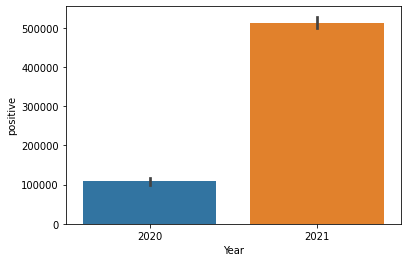

In [116]:
sns.barplot(x = 'Year',
            y = 'positive',
            data = df_1)

In [124]:
import plotly.express as px
fig = px.histogram(df_1, x='month', y='positive',title='Positive cases Every Month',color='Year',facet_row='Dayofweek',width=1000, height=1000)
fig

In [126]:
fig = px.histogram(df_1, x='month', y='death',title='Deaths Every Month',color='Year',facet_row='Dayofweek',width=1000, height=1000)
fig

In [140]:
df_f=df_1.copy()

In [142]:
df_f['Date']=df['date']

In [146]:
df_f.index=pd.to_datetime(df_f['Date'],format='%Y-%m-%d')
del df_f['Date']
df_f = df_f.reset_index()
df_f

              death  deathConfirmed  deathIncrease  deathProbable  \
Date                                                                
2021-03-07  16417.0         16085.0             43         332.00   
2021-03-06  16374.0         16044.0             52         330.00   
2021-03-05  16322.0         15992.0             26         330.00   
2021-03-04  16296.0         15967.0             44         329.00   
2021-03-03  16252.0         15925.0             70         327.00   
...             ...             ...            ...            ...   
2020-01-26   9180.0          4004.0              0         235.75   
2020-01-25   9180.0          4004.0              0         235.75   
2020-01-24   9180.0          4004.0              0         235.75   
2020-01-23   9180.0          4004.0              0         235.75   
2020-01-22   9180.0          4004.0              0         235.75   

            hospitalizedCumulative  hospitalizedCurrently  \
Date                                     

In [150]:
train = df_f[df_f.index < pd.to_datetime("2021-01-01", format='%Y-%m-%d')]
test = df_f[df_f.index >= pd.to_datetime("2021-01-01", format='%Y-%m-%d')]

In [158]:
import pandas as pd; import numpy as np
train = train.reset_index()
train

              death  deathConfirmed  deathIncrease  deathProbable  \
Date                                                                
2020-12-31  12423.0         12157.0             85         266.00   
2020-12-30  12338.0         12076.0            120         262.00   
2020-12-29  12218.0         11958.0             60         260.00   
2020-12-28  12158.0         11900.0             48         258.00   
2020-12-27  12110.0         11852.0            100         258.00   
...             ...             ...            ...            ...   
2020-01-26   9180.0          4004.0              0         235.75   
2020-01-25   9180.0          4004.0              0         235.75   
2020-01-24   9180.0          4004.0              0         235.75   
2020-01-23   9180.0          4004.0              0         235.75   
2020-01-22   9180.0          4004.0              0         235.75   

            hospitalizedCumulative  hospitalizedCurrently  \
Date                                     

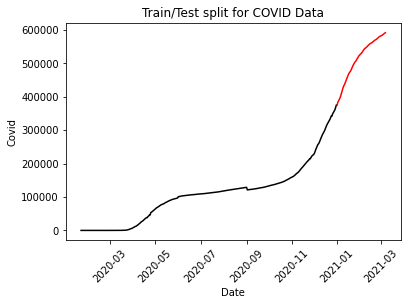

In [160]:
# plt.plot(df_f.index, df_f['positiveIncrease'], )
plt.plot(train.positive, color = "black")
plt.plot(test.positive, color = "red")
plt.ylabel('Covid')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for COVID Data")
plt.show()

In [161]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [163]:
y = train['positive']

In [164]:
ARMAmodel = SARIMAX(y, order = (1, 0, 1))

In [165]:
ARMAmodel = ARMAmodel.fit()

In [179]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index


In [ ]:
y_pred_out = y_pred_df["Predictions"] + train.positive[-1]

In [181]:
 train.positive[-1]

2.0

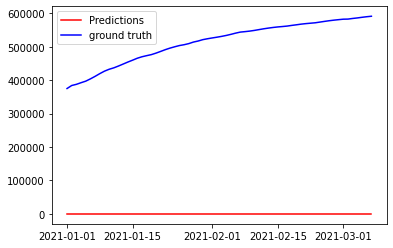

In [180]:
plt.plot(y_pred_out, color='red', label = 'Predictions')
plt.plot(test.positive, color = 'blue', label = 'ground truth')
plt.legend()

In [187]:
#cols=["Year","Month","Day"]
#df_1['date'] = df_1[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df_f1=df_f.copy()
#df_f1 = df_f1.set_index(df_f1['date'])
df_f1 = df_f1.sort_index()

train_1 = df_f1['2020-01-10':'2021-01-01']
test_1  = df_f1['2021-01-01':]

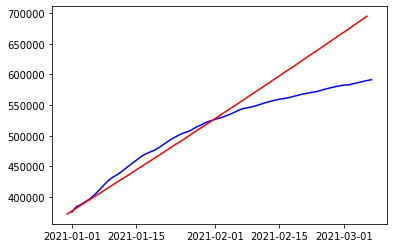

In [192]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(train_1['positive'], order = (1, 1, 1), seasonal_order = (1,1,1,12))
results=model.fit()
yhat = results.predict(start = 344, end = 409, dynamic = True)


# Plotting

import matplotlib.pyplot as plt
plt.plot(test_1['positive'], color = 'blue')
plt.plot(yhat, color = 'red')

In [193]:
from sklearn.metrics import mean_squared_error
import math

rmse = math.sqrt(mean_squared_error(test_1.positive, yhat, squared=False))
print(rmse)

205.03676936636725


In [22]:
# Week 4 Analysis

# Further develop your summary statistics tables by combing it with subset analysis (e.g. by gender or year or country)
# Two or four of subset analysis

# Subgroup by Year
# Subgroup by Season
# Subgroup by Month
# Subgroup by 

df


          date    death  deathConfirmed  deathIncrease  deathProbable  \
0   2021-03-07  16417.0         16085.0             43          332.0   
1   2021-03-06  16374.0         16044.0             52          330.0   
2   2021-03-05  16322.0         15992.0             26          330.0   
3   2021-03-04  16296.0         15967.0             44          329.0   
4   2021-03-03  16252.0         15925.0             70          327.0   
..         ...      ...             ...            ...            ...   
406 2020-01-26      NaN             NaN              0            NaN   
407 2020-01-25      NaN             NaN              0            NaN   
408 2020-01-24      NaN             NaN              0            NaN   
409 2020-01-23      NaN             NaN              0            NaN   
410 2020-01-22      NaN             NaN              0            NaN   

     hospitalizedCumulative  hospitalizedCurrently  hospitalizedIncrease  \
0                   19713.0                  66

In [28]:
df["Year"] = df["date"].dt.year
df["Month"] = df["date"].dt.month
df["Quarter"] = df["date"].dt.quarter

In [44]:
by_year = df.groupby('Year').describe()
import pandas as pd; import numpy as np
by_year.columns = ["_".join([str(index) for index in multi_index]) for multi_index in by_year.columns.ravel()]
by_year = by_year.reset_index()
by_year

   Year  death_count    death_mean    death_std  death_min  death_25%  \
0  2020        289.0   7715.373702  3254.546296        2.0    6718.00   
1  2021         66.0  14635.060606  1190.553134    12423.0   13665.25   

   death_50%  death_75%  death_max  deathConfirmed_count  ...  Month_75%  \
0     8735.0     9758.0    12423.0                 243.0  ...       10.0   
1    14680.0    15716.0    16417.0                  66.0  ...        2.0   

   Month_max  Quarter_count  Quarter_mean  Quarter_std  Quarter_min  \
0       12.0          345.0      2.597101     1.087718          1.0   
1        3.0           66.0      1.000000     0.000000          1.0   

   Quarter_25%  Quarter_50%  Quarter_75%  Quarter_max  
0          2.0          3.0          4.0          4.0  
1          1.0          1.0          1.0          1.0  

[2 rows x 209 columns]

In [46]:
by_month = df.groupby('Month').describe()
import pandas as pd; import numpy as np
by_month.columns = ["_".join([str(index) for index in multi_index]) for multi_index in by_month.columns.ravel()]
by_month = by_month.reset_index()
by_month

      death                                                                   \
      count          mean          std      min       25%      50%       75%   
Month                                                                          
1      31.0  13544.677419   645.546972  12423.0  13029.50  13583.0  14098.50   
2      28.0  15430.071429   470.927605  14607.0  15040.25  15500.5  15832.75   
3      21.0   5458.952381  7843.672899      2.0     17.00     72.0  16182.00   
4      30.0   1668.200000  1098.747544    187.0    642.50   1584.5   2726.00   
5      31.0   5510.548387   961.757310   3716.0   4771.00   5705.0   6338.00   
6      30.0   7632.933333   321.799138   7035.0   7366.75   7656.0   7886.00   
7      31.0   8370.419355   149.575794   8081.0   8255.50   8380.0   8491.00   
8      31.0   8833.387097   134.177911   8626.0   8728.00   8829.0   8934.50   
9      30.0   9245.100000   118.522906   9060.0   9142.25   9235.0   9342.25   
10     31.0   9707.000000   157.260294  

In [36]:
by_quarter = df.groupby('Quarter').describe()
import pandas as pd; import numpy as np
by_quarter.columns = ["_".join([str(index) for index in multi_index]) for multi_index in by_quarter.columns.ravel()]
by_quarter = by_quarter.reset_index()
by_quarter

        death                                                                 \
        count          mean          std     min       25%      50%      75%   
Quarter                                                                        
1        80.0  12082.062500  5681.754414     2.0  12890.75  14262.0  15529.5   
2        91.0   4943.527473  2613.107241   187.0   2823.00   5705.0   7334.5   
3        92.0   8811.641304   382.371363  8081.0   8494.50   8823.5   9135.0   
4        92.0  10527.826087   824.274568  9480.0   9836.75  10334.5  11098.5   

                 deathConfirmed                ...    Year          Month  \
             max          count          mean  ...     75%     max  count   
Quarter                                        ...                          
1        16417.0           66.0  14337.848485  ...  2021.0  2021.0  136.0   
2         8095.0           59.0   6561.457627  ...  2020.0  2020.0   91.0   
3         9456.0           92.0   8594.141304  ...  20

In [38]:
by_quarter_2020 = df[df["Year"] == 2020].groupby('Quarter').describe()
import pandas as pd; import numpy as np
by_quarter_2020.columns = ["_".join([str(index) for index in multi_index]) for multi_index in by_quarter_2020.columns.ravel()]
by_quarter_2020 = by_quarter_2020.reset_index()
by_quarter_2020

        death                                                                 \
        count          mean          std     min      25%      50%       75%   
Quarter                                                                        
1        14.0     46.500000    48.653801     2.0     8.00     29.5     68.25   
2        91.0   4943.527473  2613.107241   187.0  2823.00   5705.0   7334.50   
3        92.0   8811.641304   382.371363  8081.0  8494.50   8823.5   9135.00   
4        92.0  10527.826087   824.274568  9480.0  9836.75  10334.5  11098.50   

                 deathConfirmed                ...    Year         Month  \
             max          count          mean  ...     75%     max count   
Quarter                                        ...                         
1          153.0            0.0           NaN  ...  2020.0  2020.0  70.0   
2         8095.0           59.0   6561.457627  ...  2020.0  2020.0  91.0   
3         9456.0           92.0   8594.141304  ...  2020.0 

In [15]:
# Further transform or create new variables as necessary - important but less visible part of data analytical work

In [40]:
# Further merge additional data set if possible (population, holidays, days of week, etc.) - important but less visible part of data analytical work

mass_gov = pd.read_excel("../data/covid-19-dashboard_12-01-2022.xlsx", sheet_name=None)


In [54]:
by_age = mass_gov["TestingPosByAge"]
by_age

      End Date       Date  Number positive tests: 0-4 years  \
0   2020-03-07 2020-03-01                                 0   
1   2020-03-14 2020-03-08                                 0   
2   2020-03-21 2020-03-15                                 6   
3   2020-03-28 2020-03-22                                17   
4   2020-04-04 2020-03-29                                33   
..         ...        ...                               ...   
139 2022-11-05 2022-10-30                               457   
140 2022-11-12 2022-11-06                               396   
141 2022-11-19 2022-11-13                               330   
142 2022-11-26 2022-11-20                               350   
143 2022-12-03 2022-11-27                               157   

     Number positive tests: 5-9 years  Number positive tests: 10-14 years  \
0                                   2                                   0   
1                                   0                                   0   
2           

Text(0, 0.5, 'Date')

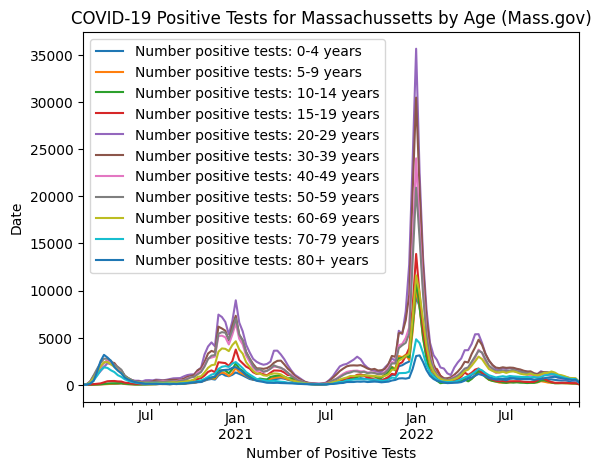

In [55]:
cols = [
    'Number positive tests: 0-4 years',
    'Number positive tests: 5-9 years',
    'Number positive tests: 10-14 years',
    'Number positive tests: 15-19 years',
    'Number positive tests: 20-29 years',
    'Number positive tests: 30-39 years',
    'Number positive tests: 40-49 years',
    'Number positive tests: 50-59 years',
    'Number positive tests: 60-69 years',
    'Number positive tests: 70-79 years',
    'Number positive tests: 80+ years'
]

by_age_plot = by_age.plot.line(x='Date', y=cols, title='COVID-19 Positive Tests for Massachussetts by Age (Mass.gov)')
by_age_plot.set_xlabel("Number of Positive Tests")
by_age_plot.set_ylabel("Date")


In [56]:
nyt = pd.read_csv("../data/ma-counties.csv")

In [58]:
nyt.drop(columns="Unnamed: 0", inplace=True, errors="ignore")

In [59]:
nyt.head()

         date   county          state     fips  cases  deaths
0  2020-02-01  Suffolk  Massachusetts  25025.0      1     0.0
1  2020-02-02  Suffolk  Massachusetts  25025.0      1     0.0
2  2020-02-03  Suffolk  Massachusetts  25025.0      1     0.0
3  2020-02-04  Suffolk  Massachusetts  25025.0      1     0.0
4  2020-02-05  Suffolk  Massachusetts  25025.0      1     0.0

In [62]:
by_county = nyt[['cases', 'deaths', 'county']].groupby('county').describe()
import pandas as pd; import numpy as np
by_county.columns = ["_".join([str(index) for index in multi_index]) for multi_index in by_county.columns.ravel()]
by_county = by_county.reset_index()
by_county

        county  cases_count     cases_mean      cases_std  cases_min  \
0   Barnstable        791.0   12920.122630   11320.985355        1.0   
1    Berkshire        798.0    7131.422306    7386.182215        1.0   
2      Bristol        791.0   59662.217446   47730.375679        1.0   
3        Dukes        780.0    1257.793590    1150.554443        1.0   
4        Essex        795.0   85954.433962   64078.945819        1.0   
5     Franklin        787.0    3095.212198    3316.932435        1.0   
6      Hampden        790.0   49398.705063   41906.637681        1.0   
7    Hampshire        786.0    9210.264631    8655.790871        1.0   
8    Middlesex        800.0  124354.540000  100551.807388        1.0   
9    Nantucket        784.0    1328.747449    1126.497928        1.0   
10     Norfolk        803.0   49811.194271   40993.337576        1.0   
11    Plymouth        790.0   45413.372152   36065.458735        3.0   
12     Suffolk        833.0   81295.315726   64618.904886       

In [18]:
# Well-organized tables
# Tabulation or rates by groups
# Regression, correlation, chi-square test, LASSO, ANOVA, etc.
# Provide well-developed visualizations
# Maps
# Line charts (epi curves)

In [19]:
# Prediction and forecasts (mandatory)
# Time series, VAR, event analysis, LASSO, SVM, PCA, etc.
# Provide the goodness of fit or prediction accuracy